In [20]:
import pandas
import altair as alt
from scipy.optimize import curve_fit
import numpy
import datetime

In [21]:
data = pandas.read_csv("virus.csv")
data['Date'] =  pandas.to_datetime(data['Date'])

In [22]:
(pandas.to_datetime("2020-03-10") - pandas.to_datetime("2020-03-01")).days

9

In [23]:
data = data[['Date', 'Number of cases']].sort_values('Date')
data['Days_since'] = (data['Date'] - pandas.to_datetime("2020-01-31"))
data['Days_since'] = data['Days_since'].apply(lambda x: x.days)

In [24]:
data

,Date,Number of cases,Days_since
16,2020-01-31,1,0
15,2020-02-04,2,4
14,2020-02-29,3,29
13,2020-03-04,14,33
12,2020-03-05,20,34
11,2020-03-09,43,38
10,2020-03-11,48,40
9,2020-03-12,66,41
8,2020-03-13,79,42
7,2020-03-14,91,43


In [25]:
([a,b],_) = curve_fit(lambda t,a,b: a*numpy.exp(b*t), data['Days_since'],  data['Number of cases'], p0=(0.01, 0.1))

In [26]:
a

0.17798420918066413

In [27]:

x = numpy.arange(90)
source = pandas.DataFrame({
  'Days_since': x,
  'projection': a*numpy.exp(b*x)
})

In [28]:
combined = data.merge(source.set_index('Days_since'), on='Days_since', how='outer')

In [29]:
combined['Date'] = combined['Days_since'].apply(lambda x: pandas.to_datetime("2020-01-31") + pandas.Timedelta(datetime.timedelta(days = x)))

In [30]:
combined

,Date,Number of cases,Days_since,projection
0,2020-01-31,1.0,0,0.177984
1,2020-02-04,2.0,4,0.318417
2,2020-02-29,3.0,29,12.073616
3,2020-03-04,14.0,33,21.599912
4,2020-03-05,20.0,34,24.980759
...,...,...,...,...
85,2020-04-25,NaN,85,41537.643543
86,2020-04-26,NaN,86,48039.171261
87,2020-04-27,NaN,87,55558.326824
88,2020-04-28,NaN,88,64254.390708


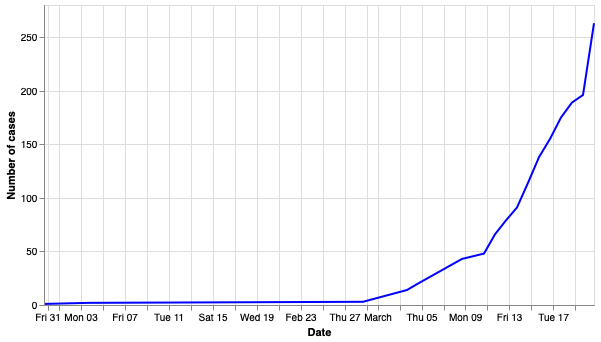

In [31]:
base = alt.Chart(data).properties(width=550)

data_chart = base.mark_line(color='blue').encode(
    x='Date',
    y='Number of cases'
)
projection_chart = base.mark_line(color='red').encode(
    x='Date',
    y='projection'
)

data_chart# + projection_chart